<a href="https://www.kaggle.com/code/leon29/hr-data-mnc-python-tableau-working?scriptVersionId=259809733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. Introduction:

Human Resource (HR) Data of a Multi-national Corporation (MNC)

This dataset contains HR information for employees of a multinational corporation (MNC). It includes 2 Million (20 Lakhs) employee records with details about personal identifiers, job-related attributes, performance, employment status, and salary information.
The dataset can be used for HR analytics, including workforce distribution, attrition analysis, salary trends, and performance evaluation.

2. ASK:

*What are the purposes of this analysis:*
- Workforce Distribution: Analyzing the demographics and structure of the workforce across different departments, locations, or roles. This could help management understand the composition of their staff and identify any imbalances.

- Attrition Analysis: Studying employee turnover to understand why employees are leaving the company. By analyzing data on terminated employees, an organization can identify trends and potential root causes of attrition, such as low job satisfaction or poor management.

- Salary Trends: Examining salary data to identify patterns, ensure fair compensation, and detect potential pay gaps. This can be used for benchmarking salaries against industry standards or for making informed decisions on compensation adjustments.

- Performance Evaluation: Assessing employee performance to identify high-achievers, pinpoint areas for improvement, and link performance to other factors like salary or retention.

*And they will be achieved by answering these questions:*

Q.1) What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?

Q.2) What is the distribution of work modes (On-site, Remote) ?

Q.3) How many employees are there in each department ?

Q.4) What is the average salary by Department ?

Q.5) Which job title has the highest average salary ?

Q.6) What is the average salary in different Departments based on Job Title ?

Q.7) How many employees Resigned & Terminated in each department ?

Q.8) How does salary vary with years of experience ?

Q.9) What is the average performance rating by department ?

Q.10) Which Country have the highest concentration of employees ?

Q.11) Is there a correlation between performance rating and salary ?

Q.12) How has the number of hires changed over time (per year) ?

Q.13) Compare salaries of Remote vs. On-site employees — is there a significant difference ?

Q.14) Find the top 10 employees with the highest salary in each department.

Q.15) Identify departments with the highest attrition rate (Resigned %).

3. PREPARE:
*Data observation:*
- License: Database Contents License (DbCL) v1.0
This dataset is highly permissive but no wanrranties of its accuracy, errors, fitness for purposes. Which means the dataset should be used only in practicing.
- Validation Date: Last update was August 23, 2025.

Process preparation:**
Setup library and import dataset

In [1]:
# Import Library
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from utils_polars import check_missing_values, check_information, check_duplicates, display_duplicates

# Import dataset

df = pl.read_csv("/kaggle/input/hr-data-mnc/HR_Data_MNC_Data Science Lovers.csv")

# USD & INR Relationship
n = 87.63

In [2]:
print("Show dataframe structure")
print("---------------------------------------------------------")
display(df.head(50))
print("check_missing_values")
print("---------------------------------------------------------")
display(df.null_count())
print("check_information")
print("---------------------------------------------------------")
display(df.describe())
print("check_duplicates")
duplicates = df.is_duplicated().sum() #May also be used with df.unique(subset = ['column'])
display(duplicates)
if duplicates > 0:
        print(f"Duplicate rows found: {duplicates}")
else:
        print("No duplicate rows found.")

Show dataframe structure
---------------------------------------------------------


Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
i64,str,str,str,str,str,str,i64,i64,str,str,i64
0,"""EMP0000001""","""Joshua Nguyen""","""IT""","""Software Engineer""","""2011-08-10""","""Isaacland, Denmark""",5,14,"""Resigned""","""On-site""",1585363
1,"""EMP0000002""","""Julie Williams""","""Marketing""","""SEO Specialist""","""2018-03-02""","""Anthonyside, Costa Rica""",2,7,"""Active""","""On-site""",847686
2,"""EMP0000003""","""Alyssa Martinez""","""HR""","""HR Manager""","""2023-03-20""","""Port Christinaport, Saudi Arab…",1,2,"""Active""","""On-site""",1430084
3,"""EMP0000004""","""Nicholas Valdez""","""IT""","""Software Engineer""","""2023-10-12""","""Port Shelbychester, Antigua an…",1,1,"""Active""","""On-site""",990689
4,"""EMP0000005""","""Joel Hendricks""","""Operations""","""Logistics Coordinator""","""2024-12-09""","""Lake Kimberly, Palestinian Ter…",5,0,"""Active""","""On-site""",535082
…,…,…,…,…,…,…,…,…,…,…,…
45,"""EMP0000046""","""James Miller""","""Marketing""","""SEO Specialist""","""2022-03-24""","""Melissafurt, Brunei Darussalam""",5,3,"""Active""","""Remote""",768681
46,"""EMP0000047""","""Donna Estes""","""Operations""","""Operations Director""","""2011-06-15""","""East Tina, China""",2,14,"""Active""","""On-site""",982133
47,"""EMP0000048""","""Tom Mills""","""HR""","""HR Executive""","""2024-01-31""","""Johnsonside, Ghana""",1,1,"""Active""","""Remote""",565467


check_missing_values
---------------------------------------------------------


Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


check_information
---------------------------------------------------------


statistic,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
str,f64,str,str,str,str,str,str,f64,f64,str,str,f64
"""count""",2e6,"""2000000""","""2000000""","""2000000""","""2000000""","""2000000""","""2000000""",2e6,2e6,"""2000000""","""2000000""",2e6
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",999999.5,null,null,null,null,null,null,3.0001485,5.010287,null,null,896887.755664
"""std""",577350.413527,null,null,null,null,null,null,1.413973,3.608823,null,null,402610.304438
"""min""",0.0,"""EMP0000001""","""Aaron Abbott""","""Finance""","""Account Manager""","""2010-08-14""","""Aaronberg, Anguilla""",1.0,0.0,"""Active""","""On-site""",300000.0
"""25%""",500000.0,null,null,null,null,null,null,2.0,2.0,null,null,616346.0
"""50%""",1e6,null,null,null,null,null,null,3.0,5.0,null,null,811027.0
"""75%""",1.499999e6,null,null,null,null,null,null,4.0,8.0,null,null,1.073745e6
"""max""",1.999999e6,"""EMP2000000""","""Zoe Zimmerman""","""Sales""","""Talent Acquisition Specialist""","""2025-08-13""","""Zunigaville, Zambia""",5.0,15.0,"""Terminated""","""Remote""",2.999976e6


check_duplicates


0

No duplicate rows found.


*Initial Data Exploration:*
1) Unnamed: 0 – Index column (auto-generated, not useful for analysis, will be deleted).
2) Employee_ID – Unique identifier assigned to each employee (e.g., EMP0000001).
3) Full_Name – Full name of the employee.
4) Department – Department in which the employee works (e.g., IT, HR, Marketing, Operations).
5) Job_Title – Designation or role of the employee (e.g., Software Engineer, HR Manager).
6) Hire_Date – The date when the employee was hired by the company.
7) Location – Geographical location of the employee (city, country).
8) Performance_Rating – Performance evaluation score (numeric scale, higher is better).
9) Experience_Years – Number of years of professional experience the employee has.
10) Status – Current employment status (e.g., Active, Resigned).
11) Work_Mode – Mode of working (e.g., On-site, Hybrid, Remote).
12) Salary_INR – Annual salary of the employee in Indian Rupees.

*Data Cleaning*
With the above checking of missing values, duplications, data input consistence, column name. No problem is found.

4. PROCESS:

In [3]:
df = df.with_columns([
    pl.col("Hire_Date").str.to_date(),
    pl.col('Salary_INR').cast(pl.Float64)
])

In [4]:
display(df)
for col in df.columns:
    print(f'The column {col} has unique values: {df[col].unique()}')
    #print(f'The column {col} has unique values: {df["{col}"].unique()}')

Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
i64,str,str,str,str,date,str,i64,i64,str,str,f64
0,"""EMP0000001""","""Joshua Nguyen""","""IT""","""Software Engineer""",2011-08-10,"""Isaacland, Denmark""",5,14,"""Resigned""","""On-site""",1.585363e6
1,"""EMP0000002""","""Julie Williams""","""Marketing""","""SEO Specialist""",2018-03-02,"""Anthonyside, Costa Rica""",2,7,"""Active""","""On-site""",847686.0
2,"""EMP0000003""","""Alyssa Martinez""","""HR""","""HR Manager""",2023-03-20,"""Port Christinaport, Saudi Arab…",1,2,"""Active""","""On-site""",1.430084e6
3,"""EMP0000004""","""Nicholas Valdez""","""IT""","""Software Engineer""",2023-10-12,"""Port Shelbychester, Antigua an…",1,1,"""Active""","""On-site""",990689.0
4,"""EMP0000005""","""Joel Hendricks""","""Operations""","""Logistics Coordinator""",2024-12-09,"""Lake Kimberly, Palestinian Ter…",5,0,"""Active""","""On-site""",535082.0
…,…,…,…,…,…,…,…,…,…,…,…
1999995,"""EMP1999996""","""Cody Russell""","""Operations""","""Logistics Coordinator""",2010-08-31,"""Casefurt, Serbia""",3,14,"""Active""","""Remote""",657648.0
1999996,"""EMP1999997""","""Tracey Smith""","""IT""","""Software Engineer""",2021-05-07,"""Dannyport, Kuwait""",3,4,"""Active""","""On-site""",1.030109e6
1999997,"""EMP1999998""","""Tracy Lee""","""Sales""","""Business Development Manager""",2024-05-29,"""Craighaven, Nigeria""",5,1,"""Active""","""Remote""",1.313085e6


The column Unnamed: 0 has unique values: shape: (2_000_000,)
Series: 'Unnamed: 0' [i64]
[
	0
	1
	2
	3
	4
	…
	1999995
	1999996
	1999997
	1999998
	1999999
]
The column Employee_ID has unique values: shape: (2_000_000,)
Series: 'Employee_ID' [str]
[
	"EMP0123043"
	"EMP0500319"
	"EMP0603603"
	"EMP1560633"
	"EMP1695610"
	…
	"EMP0924962"
	"EMP0964162"
	"EMP1989714"
	"EMP1568188"
	"EMP1264813"
]
The column Full_Name has unique values: shape: (467_487,)
Series: 'Full_Name' [str]
[
	"Bailey Galvan"
	"Joy Mcgee"
	"Douglas Conway"
	"Tamara Shields"
	"Derrick Preston"
	…
	"Stanley Vega"
	"Jocelyn Nguyen"
	"Samantha Sanders"
	"Lance Hamilton"
	"Mr. Shane Cunningham"
]
The column Department has unique values: shape: (7,)
Series: 'Department' [str]
[
	"Marketing"
	"R&D"
	"Sales"
	"Finance"
	"Operations"
	"HR"
	"IT"
]
The column Job_Title has unique values: shape: (29,)
Series: 'Job_Title' [str]
[
	"Brand Manager"
	"Sales Executive"
	"Operations Executive"
	"Supply Chain Manager"
	"CTO"
	…
	"Content S

In [5]:
display(df['Job_Title'].unique().to_list())

['Lab Technician',
 'HR Manager',
 'Operations Executive',
 'Logistics Coordinator',
 'DevOps Engineer',
 'Account Manager',
 'Financial Analyst',
 'SEO Specialist',
 'IT Manager',
 'Business Development Manager',
 'Accountant',
 'Product Developer',
 'Sales Executive',
 'Operations Director',
 'Finance Manager',
 'Talent Acquisition Specialist',
 'Data Analyst',
 'HR Director',
 'CFO',
 'Research Scientist',
 'Sales Director',
 'CTO',
 'Innovation Manager',
 'Content Strategist',
 'Brand Manager',
 'Supply Chain Manager',
 'HR Executive',
 'Marketing Executive',
 'Software Engineer']

In [6]:
# Define job levels based on common corporate hierarchy
level = {
    'C-level': ['CTO', 'CFO', 'CEO'],
    'V-level': ['VP'],
    'D-level': ['Director'],
    'B-level': ['Manager'],
    'Employee': ['Specialist', 'Engineer', 'Accountant', 'Technician', 'Scientist', 'Executive', 'Analyst', 'Developer', 'Coordinator', 'Strategist']
}

CLevel_cond = pl.col('Job_Title').str.contains('|'.join(level['C-level']))
VLevel_cond = pl.col('Job_Title').str.contains('|'.join(level['V-level']))
DLevel_cond = pl.col('Job_Title').str.contains('|'.join(level['D-level']))
BLevel_cond = pl.col('Job_Title').str.contains('|'.join(level['B-level']))
Employee_cond = pl.col('Job_Title').str.contains('|'.join(level['Employee']))

df_with_level = df.with_columns(
    pl.when(CLevel_cond).then(pl.lit('C-level'))
    .when(VLevel_cond).then(pl.lit('V-level'))
    .when(DLevel_cond).then(pl.lit('D-level'))
    .when(BLevel_cond).then(pl.lit('B-level'))
    .otherwise(pl.lit('Employee'))
    .alias('Level')
)
display(df_with_level)

Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Level
i64,str,str,str,str,date,str,i64,i64,str,str,f64,str
0,"""EMP0000001""","""Joshua Nguyen""","""IT""","""Software Engineer""",2011-08-10,"""Isaacland, Denmark""",5,14,"""Resigned""","""On-site""",1.585363e6,"""Employee"""
1,"""EMP0000002""","""Julie Williams""","""Marketing""","""SEO Specialist""",2018-03-02,"""Anthonyside, Costa Rica""",2,7,"""Active""","""On-site""",847686.0,"""Employee"""
2,"""EMP0000003""","""Alyssa Martinez""","""HR""","""HR Manager""",2023-03-20,"""Port Christinaport, Saudi Arab…",1,2,"""Active""","""On-site""",1.430084e6,"""B-level"""
3,"""EMP0000004""","""Nicholas Valdez""","""IT""","""Software Engineer""",2023-10-12,"""Port Shelbychester, Antigua an…",1,1,"""Active""","""On-site""",990689.0,"""Employee"""
4,"""EMP0000005""","""Joel Hendricks""","""Operations""","""Logistics Coordinator""",2024-12-09,"""Lake Kimberly, Palestinian Ter…",5,0,"""Active""","""On-site""",535082.0,"""Employee"""
…,…,…,…,…,…,…,…,…,…,…,…,…
1999995,"""EMP1999996""","""Cody Russell""","""Operations""","""Logistics Coordinator""",2010-08-31,"""Casefurt, Serbia""",3,14,"""Active""","""Remote""",657648.0,"""Employee"""
1999996,"""EMP1999997""","""Tracey Smith""","""IT""","""Software Engineer""",2021-05-07,"""Dannyport, Kuwait""",3,4,"""Active""","""On-site""",1.030109e6,"""Employee"""
1999997,"""EMP1999998""","""Tracy Lee""","""Sales""","""Business Development Manager""",2024-05-29,"""Craighaven, Nigeria""",5,1,"""Active""","""Remote""",1.313085e6,"""B-level"""


In [7]:
df_with_level = df_with_level.with_columns(
    pl.col('Hire_Date').dt.year().alias('Hire_Year'),
    pl.col('Hire_Date').dt.month().alias('Hire_Month'),
    pl.col('Hire_Date').dt.weekday().alias('Hire_Weekday'),
    (pl.col('Salary_INR')/n).alias('Salary_USD')
)
display(df_with_level)

Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Level,Hire_Year,Hire_Month,Hire_Weekday,Salary_USD
i64,str,str,str,str,date,str,i64,i64,str,str,f64,str,i32,i8,i8,f64
0,"""EMP0000001""","""Joshua Nguyen""","""IT""","""Software Engineer""",2011-08-10,"""Isaacland, Denmark""",5,14,"""Resigned""","""On-site""",1.585363e6,"""Employee""",2011,8,3,18091.555403
1,"""EMP0000002""","""Julie Williams""","""Marketing""","""SEO Specialist""",2018-03-02,"""Anthonyside, Costa Rica""",2,7,"""Active""","""On-site""",847686.0,"""Employee""",2018,3,5,9673.46799
2,"""EMP0000003""","""Alyssa Martinez""","""HR""","""HR Manager""",2023-03-20,"""Port Christinaport, Saudi Arab…",1,2,"""Active""","""On-site""",1.430084e6,"""B-level""",2023,3,1,16319.570923
3,"""EMP0000004""","""Nicholas Valdez""","""IT""","""Software Engineer""",2023-10-12,"""Port Shelbychester, Antigua an…",1,1,"""Active""","""On-site""",990689.0,"""Employee""",2023,10,4,11305.36346
4,"""EMP0000005""","""Joel Hendricks""","""Operations""","""Logistics Coordinator""",2024-12-09,"""Lake Kimberly, Palestinian Ter…",5,0,"""Active""","""On-site""",535082.0,"""Employee""",2024,12,1,6106.150862
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1999995,"""EMP1999996""","""Cody Russell""","""Operations""","""Logistics Coordinator""",2010-08-31,"""Casefurt, Serbia""",3,14,"""Active""","""Remote""",657648.0,"""Employee""",2010,8,2,7504.827114
1999996,"""EMP1999997""","""Tracey Smith""","""IT""","""Software Engineer""",2021-05-07,"""Dannyport, Kuwait""",3,4,"""Active""","""On-site""",1.030109e6,"""Employee""",2021,5,5,11755.209403
1999997,"""EMP1999998""","""Tracy Lee""","""Sales""","""Business Development Manager""",2024-05-29,"""Craighaven, Nigeria""",5,1,"""Active""","""Remote""",1.313085e6,"""B-level""",2024,5,3,14984.423143


There are remarkable value in various field:
1) Department: Finance, IT, Operations, HR, Marketing, Sales, and R&D.
2) Levels of management: Spreading from C-level to Employee.

In [8]:
# Export to csv
#df_with_level.write_csv('HR_Data_MNC_with_levels.csv')

5. ANALYSIS:
My aiming is practicing data visualization with Tableau, so most of questions are done in Tableau instead.

5.1 Tableau:

From Question 1-10:

In [9]:
%%HTML 

<div class='tableauPlaceholder' id='viz1756390588591' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HR_Data_MNC_Part1&#47;Q1_DistributionofEmployeeStatus&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HR_Data_MNC_Part1&#47;Q1_DistributionofEmployeeStatus' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HR_Data_MNC_Part1&#47;Q1_DistributionofEmployeeStatus&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1756390588591');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Question 11: Working in Python

In [10]:
df.select('Performance_Rating', 'Salary_INR').corr()

Performance_Rating,Salary_INR
f64,f64
1.0,-0.000209
-0.000209,1.0


From Question 12-15:

In [11]:
%%HTML 

<div class='tableauPlaceholder' id='viz1756390619574' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HR_Data_MNC_Part2&#47;Q11_CorrelationbetweenPerformanceRatingSalary_Too&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HR_Data_MNC_Part2&#47;Q11_CorrelationbetweenPerformanceRatingSalary_Too' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HR_Data_MNC_Part2&#47;Q11_CorrelationbetweenPerformanceRatingSalary_Too&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1756390619574');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

5.2 Python:

Question 1:

It can be found the most is Active status, and the least are Terminated & Resigned.

Additionally, the Active status is about 3.5 times to the Resigned. Based on basic Turnover rate, the rate is about 30%, which is really a concern as I found the highest in US was only 13.5% and in various industry, this rate fluctuates between 9% to 24%.

shape: (4, 2)
┌────────────┬─────────┐
│ Status     ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│ Active     ┆ 1401558 │
│ Terminated ┆ 99870   │
│ Resigned   ┆ 398660  │
│ Retired    ┆ 99912   │
└────────────┴─────────┘


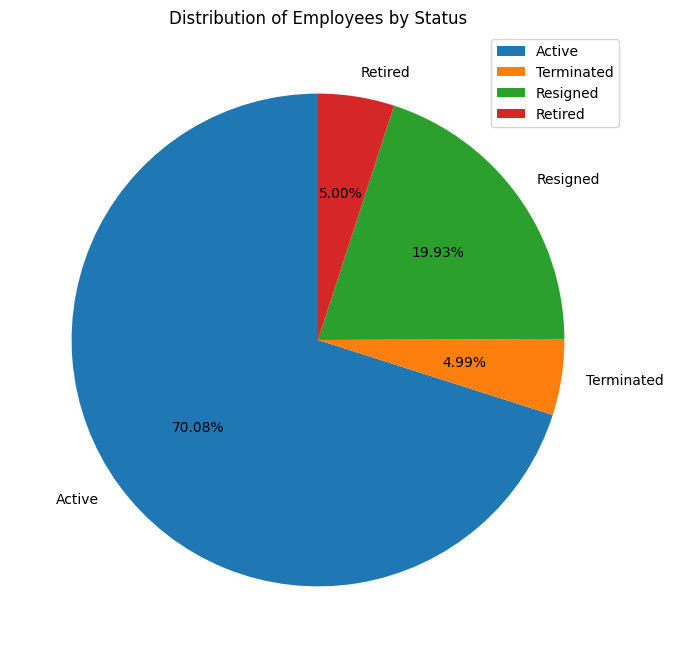

In [12]:
pie_define = df_with_level['Status'].value_counts()
print(pie_define)

fig, ax = plt.subplots(figsize =(10,8))
ax.pie(pie_define['count'],labels = pie_define['Status'],autopct='%1.2f%%', startangle=90)
ax.set_title('Distribution of Employees by Status')
plt.legend(loc ='upper right')
plt.show()

Question 2:

The On-site work mode is more popular than the Remote.

shape: (2, 2)
┌───────────┬─────────┐
│ Work_Mode ┆ count   │
│ ---       ┆ ---     │
│ str       ┆ u32     │
╞═══════════╪═════════╡
│ Remote    ┆ 800891  │
│ On-site   ┆ 1199109 │
└───────────┴─────────┘


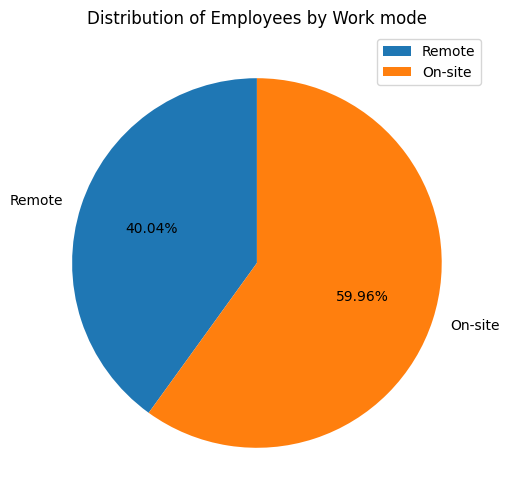

In [13]:
pie_define = df_with_level['Work_Mode'].value_counts()
print(pie_define)
fig, ax = plt.subplots(figsize = (10,6))
ax.pie(pie_define['count'],labels=pie_define['Work_Mode'],autopct='%1.2f%%',startangle=90)
ax.set_title('Distribution of Employees by Work mode')
plt.legend()
plt.show()

Question 3:

And in this case, IT and Sales are the departments with the top remarkable highest employment. I believe this may be an Information Technology related company.

shape: (7, 2)
┌────────────┬─────────────┐
│ Department ┆ Employee_ID │
│ ---        ┆ ---         │
│ str        ┆ u32         │
╞════════════╪═════════════╡
│ IT         ┆ 601042      │
│ Sales      ┆ 400031      │
│ Operations ┆ 300095      │
│ Marketing  ┆ 240081      │
│ Finance    ┆ 199873      │
│ HR         ┆ 159119      │
│ R&D        ┆ 99759       │
└────────────┴─────────────┘


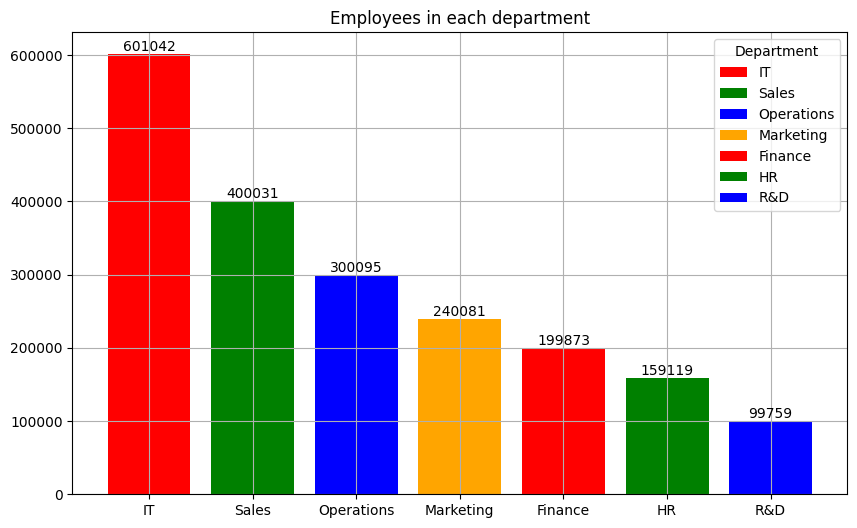

In [14]:
employee_department = df_with_level.group_by('Department').agg(pl.col('Employee_ID').count()).sort('Employee_ID',descending = True)
print(employee_department)

fig,ax = plt.subplots(figsize = (10,6))
custom_colors = ['red', 'green', 'blue', 'orange']
bars =  ax.bar(employee_department['Department'],employee_department['Employee_ID'],label = employee_department['Department'], color = custom_colors)
ax.bar_label(bars)
ax.set_title('Employees in each department')
ax.legend(title='Department')

plt.grid()
plt.show()

Question 4: Average salary by department

Based on what the chart demonstrates, the company focused on the IT, Finance, and R&D. These also reinforce the idea that this is an Information Technology company.

shape: (7, 2)
┌────────────┬────────────────┐
│ Department ┆ AVG_Salary_USD │
│ ---        ┆ ---            │
│ str        ┆ f64            │
╞════════════╪════════════════╡
│ IT         ┆ 12893.508518   │
│ Finance    ┆ 10731.618656   │
│ R&D        ┆ 9133.597594    │
│ Sales      ┆ 9048.931411    │
│ Marketing  ┆ 8786.2165      │
│ Operations ┆ 8611.505802    │
│ HR         ┆ 8488.571966    │
└────────────┴────────────────┘


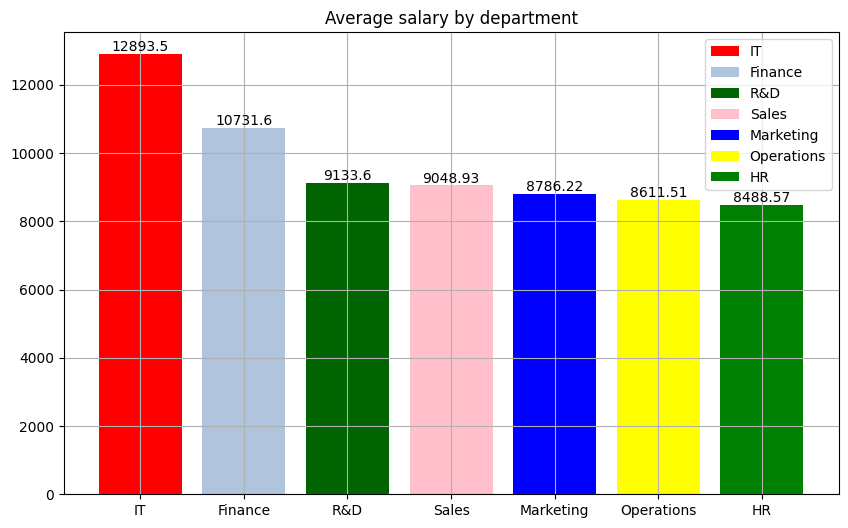

In [15]:
AVE_Salary_Department = df_with_level.group_by('Department').agg(pl.col('Salary_USD').mean().alias('AVG_Salary_USD')).sort('AVG_Salary_USD',descending = True)
print(AVE_Salary_Department)

color_map = {
    'IT': 'red',
    'HR': 'green',
    'Marketing': 'blue',
    'Sales': 'pink',
    'Operations': 'yellow',
    'Finance': 'lightsteelblue',
    'R&D': 'darkgreen'
}
custom_colors = [color_map.get(dept, 'gray') for dept in AVE_Salary_Department['Department']]

fig,ax = plt.subplots(figsize=(10,6))
bar = ax.bar(AVE_Salary_Department['Department'],AVE_Salary_Department['AVG_Salary_USD'],label = AVE_Salary_Department['Department'],color = custom_colors)
ax.bar_label(bar)
ax.set_title('Average salary by department')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Question 5: Job titles with highest AVE salary

shape: (29, 2)
┌──────────────────────────────┬────────────────┐
│ Job_Title                    ┆ AVE_Salary_USD │
│ ---                          ┆ ---            │
│ str                          ┆ f64            │
╞══════════════════════════════╪════════════════╡
│ IT Manager                   ┆ 23943.350184   │
│ Finance Manager              ┆ 19893.204671   │
│ HR Manager                   ┆ 14291.931017   │
│ Business Development Manager ┆ 14287.529742   │
│ Software Engineer            ┆ 13685.505456   │
│ …                            ┆ …              │
│ SEO Specialist               ┆ 7993.33946     │
│ Sales Executive              ┆ 7420.264235    │
│ Accountant                   ┆ 7418.423847    │
│ Logistics Coordinator        ┆ 7413.34847     │
│ HR Executive                 ┆ 6282.652736    │
└──────────────────────────────┴────────────────┘


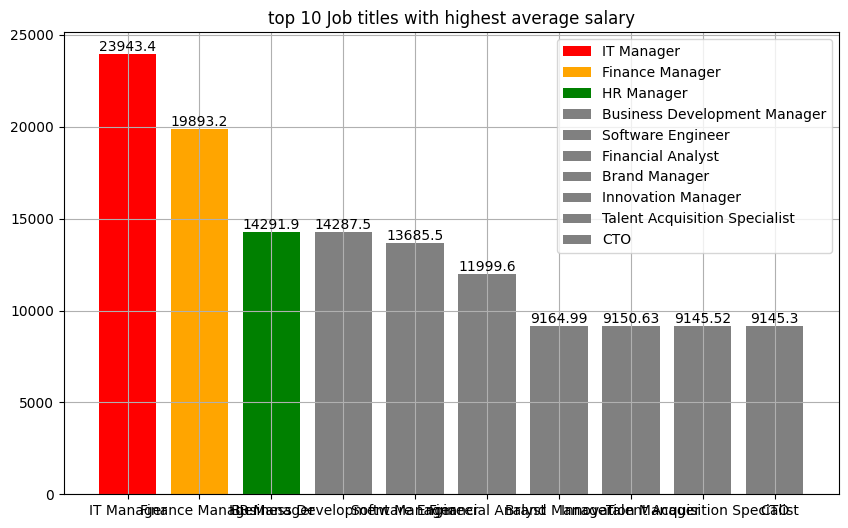

In [16]:
Title_AVE_Salary = df_with_level.group_by('Job_Title').agg(pl.col('Salary_USD').mean().alias('AVE_Salary_USD')).sort('AVE_Salary_USD',descending = True)
print(Title_AVE_Salary)
n_top = 10;
Title_AVE_Salary = Title_AVE_Salary.head(n_top)
Title_AVE_Salary = Title_AVE_Salary.with_columns(pl.col('AVE_Salary_USD').rank(descending = True,method = 'min').alias('rank'))

color_map = {
    1.0: 'red',
    2.0: 'orange',
    3.0: 'green'
}
custom_color = [color_map.get(rank,'gray') for rank in Title_AVE_Salary['rank']]

fig,ax = plt.subplots(figsize = (10,6))
bars = ax.bar(Title_AVE_Salary['Job_Title'],Title_AVE_Salary['AVE_Salary_USD'], label = Title_AVE_Salary['Job_Title'],color = custom_color)
ax.bar_label(bars)
ax.set_title(f'top {n_top} Job titles with highest average salary')
plt.legend()
plt.grid()
plt.show()

Question 6: AVE Salary of Job titles in each department.

Working...